In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
filepath = "lyrics_with_lang.csv"
lyrics_df = pd.read_csv(filepath)
lyrics_df.set_index('index', inplace = True)
lyrics_df.head()

,song,year,artist,genre,lyrics,language
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",en
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",en
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,en
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",en
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",en


In [6]:
lyrics_df['language'].value_counts()

en         238231
es           7892
de           3767
ro           2570
fr           2228
id           2141
it           1962
pt           1626
no lang      1172
sw            735
nl            515
sv            511
fi            447
tr            399
tl            386
no            366
hr            237
so            230
hu            182
ca            139
pl            134
da            118
sq            115
cy            111
af             99
lt             72
et             62
vi             43
sl             33
sk             18
cs              8
lv              5
ja              2
uk              1
Name: language, dtype: int64

In [10]:
lyrics_df[lyrics_df['language'] == 'no lang'].head()

,song,year,artist,genre,lyrics,language
index,,,,,,
3974,aaeun-ainoii,2006,dicaiaaoi-aeaenaiad,Not Available,"-.\n,\n.\n,\n,\n, ...\n, .\n.\n, ,\n-.\n, :\n""...",no lang
3975,ao,2006,dicaiaaoi-aeaenaiad,Not Available,",\n.\n,\n- .\n,\n- .\n,\n.\n,\n, , .\n... .\n....",no lang
3976,eaieeaaca,2006,dicaiaaoi-aeaenaiad,Not Available,".\n.\n- ,\n, , ,\n.\n-\n- .\n.\n, ,\n, ,\n, !\...",no lang
3977,iiiieia-ieeioa-xadiiai-otheuiaia,2006,dicaiaaoi-aeaenaiad,Not Available,",\n.\n,\n.\n, """" ,\n,\n"""" .\n,\n,\n,\n.\n,\n,\...",no lang
3978,ooeiay-ioioa,2006,dicaiaaoi-aeaenaiad,Not Available,", .\n! .\n. .\n. .\n.\n, .\n... - ,\n... - .\n...",no lang


In [11]:
lyrics_en = lyrics_df[lyrics_df['language']== 'en']

In [13]:
artists = set(lyrics_en['artist'])
print("number of artists : ", len(artists))

number of artists :  12867


In [14]:
genres = set(lyrics_en['genre'])
print("nb of genres : ", len(genres), "-->", genres)

nb of genres :  12 --> {'Hip-Hop', 'Pop', 'Electronic', 'Metal', 'Not Available', 'R&B', 'Indie', 'Rock', 'Folk', 'Jazz', 'Country', 'Other'}


In [18]:
songs_per_genre = {}
total_songs = 0
unknown_songs = 0
for genre in genres:
    nb = len(lyrics_en[lyrics_en['genre'] == genre])
    songs_per_genre[genre] = nb
    total_songs += nb
    if genre == "Not Available" or genre == "Other":
        unknown_songs += nb
songs_per_genre

{'Country': 14254,
 'Electronic': 7012,
 'Folk': 1781,
 'Hip-Hop': 23036,
 'Indie': 2973,
 'Jazz': 7358,
 'Metal': 21530,
 'Not Available': 17578,
 'Other': 3987,
 'Pop': 34808,
 'R&B': 3350,
 'Rock': 100564}

In [19]:
unknown_songs/total_songs

0.09052138470644039

In [20]:
total_songs

238231

In [21]:
nb_song_per_artists = {}
for a in artists :
    nb_song_per_artists[a] = len(set(lyrics_en[lyrics_en['artist'] == a]['song']))

In [22]:
nb_song_per_artists

{'edyta-gorniak': 4,
 'dj-kent': 1,
 'cindy-gomez': 1,
 'deaconofjazz': 1,
 'fabulous-echoes': 2,
 'gareth-malone-s-all-star-choir': 1,
 'bianca-ryan': 15,
 'christmas-songs': 32,
 'big-sixes': 12,
 'dizzee-rascal': 71,
 'dead-kennedys': 82,
 'domenic-marte': 1,
 'borges-sarah': 2,
 'dramagods': 14,
 'band-de-soleil': 11,
 'dogs-of-peace': 3,
 'gelka': 1,
 'dave-koz': 19,
 'graces-jones': 1,
 'das-modul': 2,
 'bigwig': 51,
 'drew-holcomb-and-the-neighbors': 18,
 'fury': 1,
 'everybody-else': 3,
 'daughter-darling': 13,
 'generations-from-exile-tribe': 1,
 'brothertiger': 1,
 'gaia-epicus': 11,
 'cousin-stizz': 1,
 'finn-neil': 12,
 'brian-vander-ark': 14,
 'black-machine': 1,
 'bearoid': 10,
 'devin-miles': 1,
 'black-gold': 11,
 'audubon': 2,
 'april-divine': 1,
 'doane-melanie': 11,
 'andrew-mcmahon-in-the-wilderness': 11,
 'andrea-lewis': 9,
 'as-i-lay-dying': 74,
 'earl-hines': 25,
 'eli-and-fur': 1,
 'do-or-die': 51,
 'bishop-of-hexen': 2,
 'brent-loveday': 3,
 'enriquez-jocelyn':

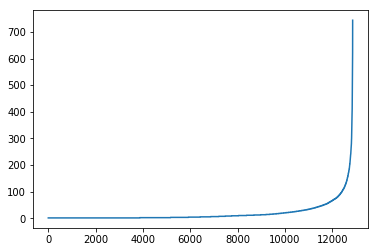

In [24]:
plt.plot(np.arange(12867), sorted(nb_song_per_artists.values()))
plt.show()

In [36]:
from collections import Counter

In [39]:
c = Counter(nb_song_per_artists)
c.most_common(30)

[('dolly-parton', 744),
 ('elton-john', 671),
 ('chris-brown', 624),
 ('eddy-arnold', 591),
 ('barbra-streisand', 588),
 ('bee-gees', 587),
 ('bob-dylan', 578),
 ('eminem', 575),
 ('ella-fitzgerald', 567),
 ('american-idol', 563),
 ('dean-martin', 556),
 ('david-bowie', 540),
 ('b-b-king', 536),
 ('elvis-costello', 514),
 ('bruce-springsteen', 508),
 ('beach-boys', 466),
 ('bill-anderson', 465),
 ('eric-clapton', 445),
 ('frank-zappa', 425),
 ('chumbawamba', 421),
 ('frank-sinatra', 411),
 ('chicago', 400),
 ('britney-spears', 398),
 ('diana-ross', 397),
 ('50-cent', 394),
 ('chamillionaire', 392),
 ('beatles', 390),
 ('emmylou-harris', 383),
 ('bon-jovi', 379),
 ('barry-manilow', 374)]

### Most common words per genre

In [68]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [97]:
def clean_lyrics(l):
    l = l.replace('\n', ' ').replace('(', '').replace(')', '')
    #Remove stopwords
    #l = [word for word in l if word not in stopwords.words('english')]
    return l.lower()

In [98]:
def get_word_counter_for_genre(g): 
    words = []
    for i,r in lyrics_en[lyrics_df['genre'] == g].iterrows():
        words.append(clean_lyrics(r['lyrics']))
    words = [x.split(' ') for x in words]
    words = [item for sublist in words for item in sublist]
    #words = [w for w in words if w not in stopwords.words('english')]
    return Counter(words)

In [103]:
c = get_word_counter_for_genre('R&B')

/Users/emma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [108]:
counters_per_genre = {}
for g in genres:
    print(g)
    counters_per_genre[g] = get_word_counter_for_genre(g)

Hip-Hop


/Users/emma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


Pop
Electronic
Metal
Not Available
R&B
Indie
Rock
Folk
Jazz
Country
Other


In [104]:
c.most_common(10)

[('you', 30741),
 ('i', 28659),
 ('the', 23468),
 ('to', 18371),
 ('and', 16393),
 ('a', 13185),
 ('me', 11999),
 ('my', 10449),
 ('it', 9556),
 ('in', 8264)]

In [105]:
for word in list(c):
    if word in stopwords.words('english'):
        del c[word]

In [107]:
c.most_common(10)

[('love', 6497),
 ("i'm", 6407),
 ('know', 4823),
 ('baby', 3590),
 ('got', 3579),
 ('like', 3419),
 ('want', 3046),
 ('get', 3042),
 ('oh', 2741),
 ("can't", 2649)]

In [109]:
for g in genres:
    for word in list(counters_per_genre[g]):
        if word in stopwords.words('english'):
            del counters_per_genre[g][word]

In [110]:
for g in genres:
    print("---", g, "----")
    print(counters_per_genre[g].most_common(20))

--- Hip-Hop ----
[("i'm", 119931), ('like', 96219), ('get', 73775), ('got', 66298), ('know', 56792), ("ain't", 42955), ('nigga', 34135), ('see', 32034), ('go', 29825), ('shit', 29636), ('make', 29184), ('love', 28470), ('niggas', 27764), ('back', 27045), ('fuck', 27023), ('ya', 26728), ('one', 26415), ('want', 25779), ('never', 24385), ("that's", 24305)]
--- Pop ----
[("i'm", 81118), ('love', 73276), ('know', 56325), ('like', 49656), ('oh', 37839), ('got', 35003), ('get', 33819), ('want', 32280), ('never', 31020), ('one', 30020), ('go', 29365), ('let', 28810), ('see', 28189), ("can't", 28118), ('time', 27885), ('baby', 27754), ('make', 25525), ('come', 24892), ("i'll", 24015), ('way', 23940)]
--- Electronic ----
[("i'm", 11674), ('love', 9265), ('know', 7300), ('like', 7274), ('get', 6156), ('come', 5163), ('go', 5146), ('got', 4887), ('want', 4875), ('see', 4777), ('feel', 4688), ("can't", 4596), ('oh', 4497), ('one', 4456), ('never', 4435), ('time', 4372), ('make', 4063), ('let', 397

### Explore Part - of - speech Tagging

In [111]:
import nltk

In [164]:
l = lyrics_en.loc[(lyrics_en['artist'] == 'beyonce') & (lyrics_en['song'] == 'flawless'), 'lyrics'].values[0]

In [165]:
l = l.replace('\n', ' ')#.replace('\'', '')
l

'I\'m bout that H, town coming coming down I\'m coming down, drippin\' candy on the ground H, Town, Town, I\'m coming down, coming down Drippin\' candy on the ground I know when you were little girls You dreamt of being in my world Don\'t forget it, don\'t forget it Respect that, bow down bitches I took some time to live my life But don\'t think I\'m just his little wife Don\'t get it twisted, get it twisted This my shit, bow down bitches Bow down bitches, bow bow down bitches (Crown) Bow down bitches, bow bow down bitches (Crown) H Town bitches H, H Town bitches I\'m so crown crown, bow down bitches I\'m about that H, town, coming coming down I\'m coming down, drippin\' candy on the ground H, Town, Town, I\'m coming down, coming down Drippin\' candy on the ground We teach girls to shrink themselves To make themselves smaller We say to girls "You can have ambition But not too much You should aim to be successful But not too successful Otherwise you will threaten the man" Because I am f

In [167]:
text = nltk.word_tokenize(l)
nltk.pos_tag(text)

[('I', 'PRP'),
 ("'m", 'VBP'),
 ('bout', 'IN'),
 ('that', 'DT'),
 ('H', 'NNP'),
 (',', ','),
 ('town', 'NN'),
 ('coming', 'VBG'),
 ('coming', 'VBG'),
 ('down', 'RP'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('coming', 'VBG'),
 ('down', 'RP'),
 (',', ','),
 ('drippin', 'NN'),
 ("'", "''"),
 ('candy', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('ground', 'NN'),
 ('H', 'NNP'),
 (',', ','),
 ('Town', 'NNP'),
 (',', ','),
 ('Town', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('coming', 'VBG'),
 ('down', 'RP'),
 (',', ','),
 ('coming', 'VBG'),
 ('down', 'RP'),
 ('Drippin', 'NNP'),
 ("'", 'POS'),
 ('candy', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('ground', 'NN'),
 ('I', 'PRP'),
 ('know', 'VBP'),
 ('when', 'WRB'),
 ('you', 'PRP'),
 ('were', 'VBD'),
 ('little', 'JJ'),
 ('girls', 'NNS'),
 ('You', 'PRP'),
 ('dreamt', 'VBP'),
 ('of', 'IN'),
 ('being', 'VBG'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('world', 'NN'),
 ('Do', 'VBP'),
 ("n't", 'RB'),
 ('forget', 'VB'),
 ('it', 'PRP'),
 (',', ','),
 ('do', 'VBP'

The list is as follows:

ADJ: adjective
ADP: adposition
ADV: adverb
AUX: auxiliary verb
CONJ: coordinating conjunction
DET: determiner
INTJ: interjection
NOUN: noun
NUM: numeral
PART: particle
PRON: pronoun
PROPN: proper noun
PUNCT: punctuation
SCONJ: subordinating conjunction
SYM: symbol
VERB: verb
X: other

In [168]:
import spacy

In [169]:
en_nlp = spacy.load('en')

In [170]:
doc = en_nlp(l)

In [171]:
doc[10]

I

In [172]:
doc[10].tag_

'PRP'

In [173]:
doc[10].pos_

'PRON'